#### Examples for graphical methods provided by dsldPy

The goal is to make each function call as simple as possible for the users. The following examples of functions are illustrated:

1. dsldPyScatterPlot
2. dsldFreqParCoord
3. dsldPyConditsDisparity
3. dsldPyBnLearn
5. dsldConfounders / dsldDensityByS

In [9]:
# load necessary libraries
import pandas as pd
import numpy as np
import sys, os

# r-conversions
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

# load dsld package
sys.path.append(os.path.abspath(".."))  

R = ro.r
R('if ("dsld" %in% loadedNamespaces()) detach("package:dsld", unload=TRUE)')
R('if (!requireNamespace("devtools", quietly=TRUE)) install.packages("devtools")')
R('devtools::load_all("~/Desktop/dsld", quiet=TRUE)')

from Utils import preprocess_data, read_data

dsld = importr("dsld")

R callback write-console: 




*********************



  Navigating dsld:

      Type vignette("Quick_Start",package="dsld") for a quick overview!

      Type vignette("Function_List",package="dsld") for a categorized function list

      Latest version at https://github.com/matloff/dsld
  


In [10]:
### data preprocessing

### most dsldPy functions require a R data.frame object as input (NOT pandas dataframe)
### the preprocessing is done in the Utils.py file by the function preprocess_data
### user needs to manually provide the categorical and numerical features (list)
### the function preprocess_data returns a R data.frame object -> this is the required input for the dsldPy functions

# two datasets
# svcensus data
df = read_data('~/Desktop/dsld/data/svcensus.RData')

# preprocess data
cat_features = ['educ', 'occ', 'gender']
num_features= ['age', 'wageinc', 'wkswrkd']
svcensus = preprocess_data(df, cat_features, num_features)

# compas1 data
df = read_data('~/Desktop/dsld/data/compas1.RData')

# preprocess data
cat_features = ["sex", "two_year_recid", "race"]
num_features = ["age","juv_fel_count","decile_score","juv_misd_count","juv_other_count","priors_count","c_jail_in","c_jail_out","c_offense_date","screening_date","in_custody","out_custody"]
compas1 = preprocess_data(df, cat_features, num_features)


In [11]:
### 1. ------------------------------ dsldPyScatterPlot3D ------------------------------
from dsldPyScatterPlot3D import dsldPyScatterPlot3D

### funnily, this is the only function that takes in a non R-Data object (dataframe) as input
### requires a pandas dataframe as input --- ONLY FOR THIS FUNCTION

df = read_data('~/Desktop/dsld/data/svcensus.RData')
a = dsldPyScatterPlot3D(df, ['wageinc', 'wkswrkd', 'age'], 'gender')
# a.show() 

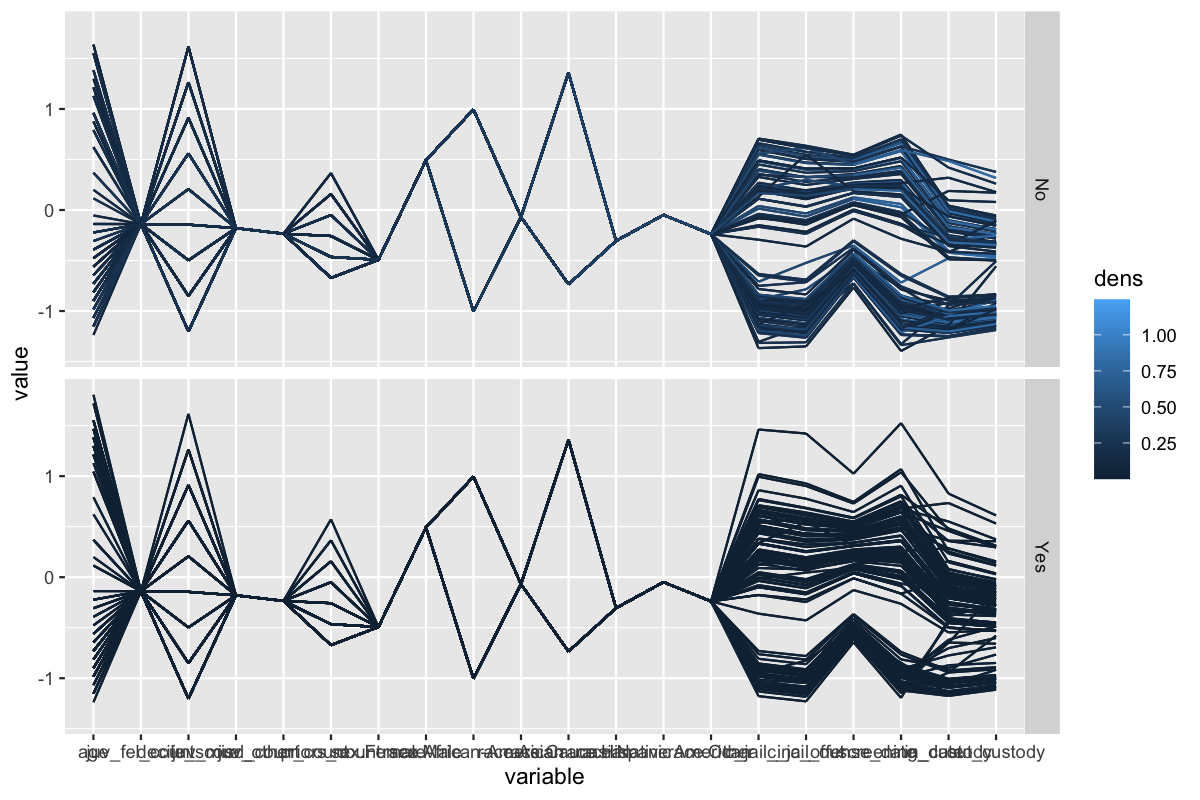

In [4]:
### 2. ------------------------------ dsldPyFreqPCoord ------------------------------
from dsldPyFreqPCoord import dsldPyFreqPCoord
dsldPyFreqPCoord(compas1, 100, 'two_year_recid')

R callback write-console: In addition:   
R callback write-console: Warning messages:
  
R callback write-console: 1:   
R callback write-console: In qeFtn(curData, yName, holdout = NULL) :  
R callback write-console: 
   
R callback write-console:  no value specified for yesYVal, default used: No
  
R callback write-console: 2:   
R callback write-console: In qeFtn(curData, yName, holdout = NULL) :  
R callback write-console: 
   
R callback write-console:  no value specified for yesYVal, default used: No
  
R callback write-console: 3:   
R callback write-console: In qeFtn(curData, yName, holdout = NULL) :  
R callback write-console: 
   
R callback write-console:  no value specified for yesYVal, default used: No
  


$rect
$rect$w
[1] 9.894092

$rect$h
[1] 0.1300267

$rect$left
[1] 41.30591

$rect$top
[1] 0.6911308


$text
$text$x
[1] 44.18165 44.18165 44.18165

$text$y
[1] 0.6586241 0.6261174 0.5936107




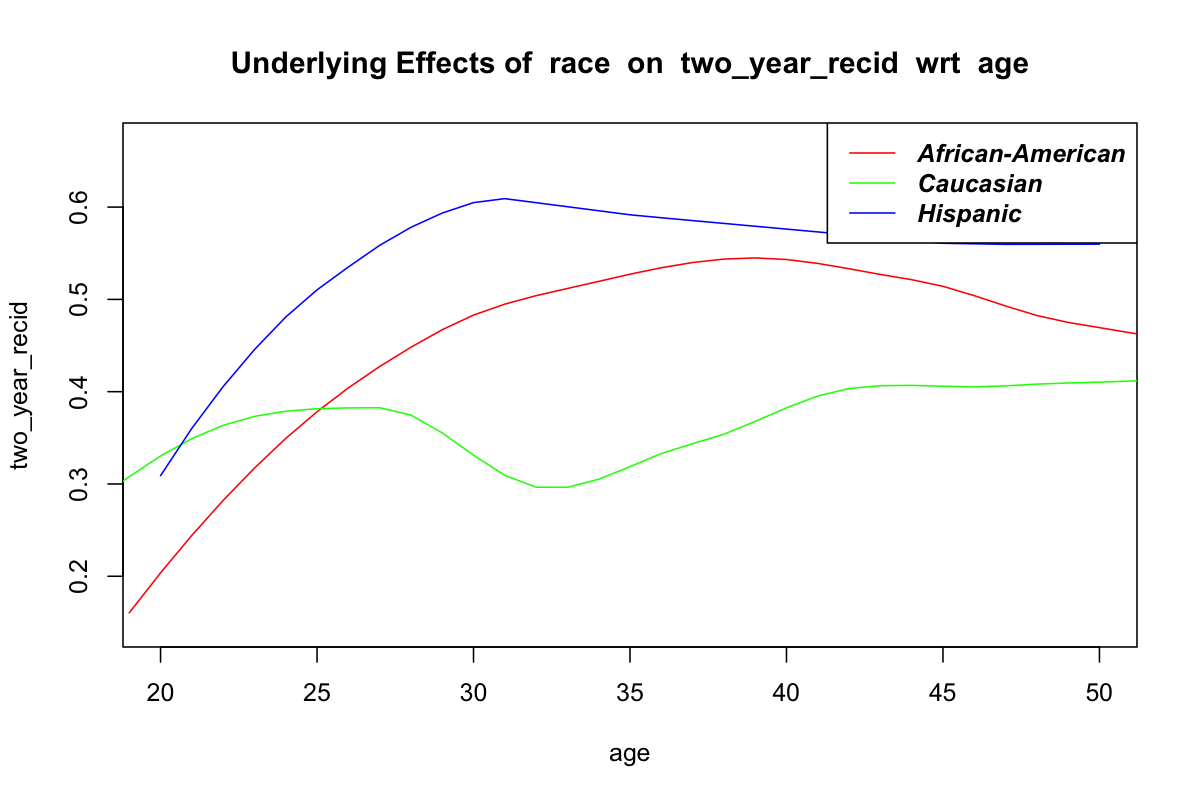

In [5]:
### 3. ------------------------------ dsldPyConditDisparity ------------------------------
from dsldPyConditDisparity import dsldPyConditDisparity
dsldPyConditDisparity(compas1, "two_year_recid", "race", "age", ["priors_count <= 4","decile_score>=6"])

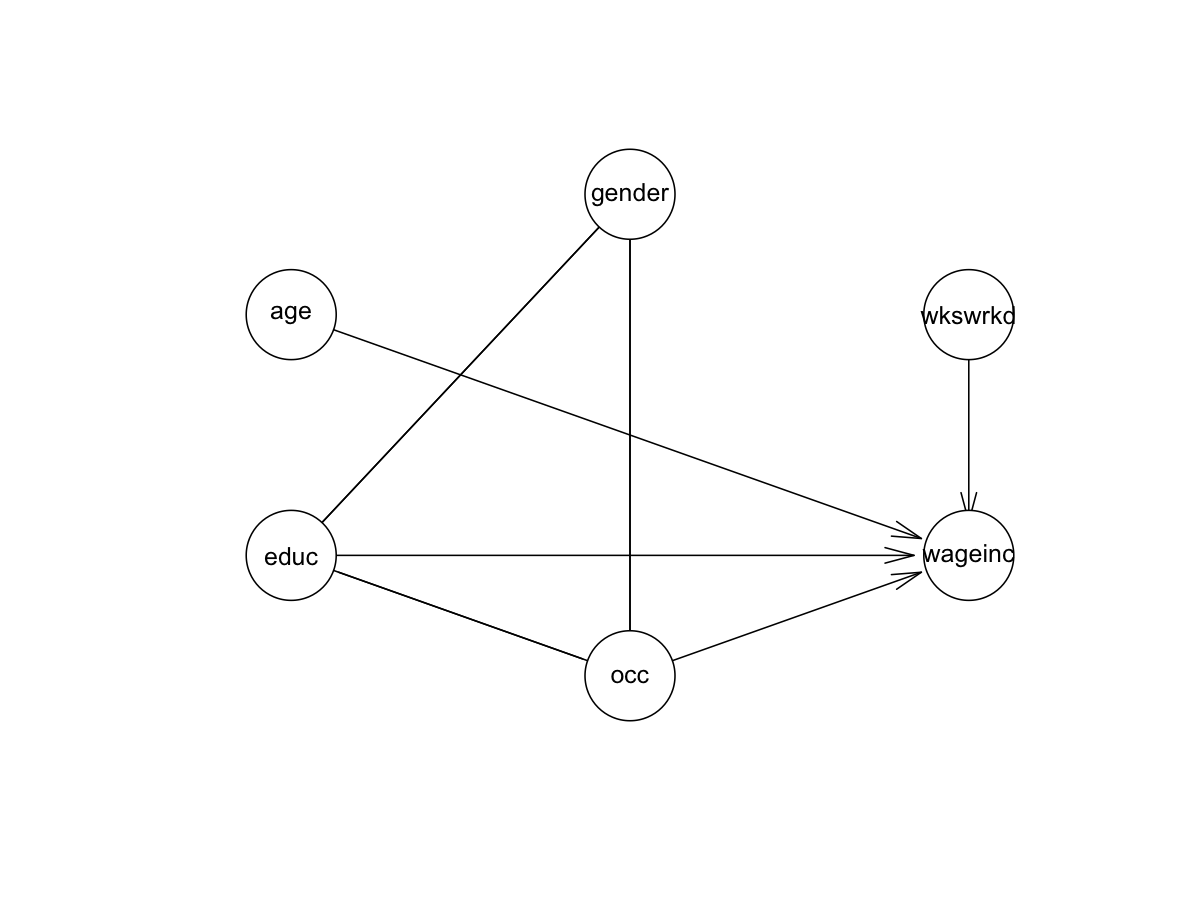

'iamb.png'

In [6]:
### 4. ------------------------------ dsldPyIamb ------------------------------
from dsldPyBnLearn import dsldPyIamb
dsldPyIamb(svcensus)

In [ ]:
### 6. ------------------------------ dsldPyConfounders/dsldPyDensitybyS ------------------------------
from dsldPyConfounders import dsldPyConfounders
from dsldPyDensitybyS import dsldPyDensitybyS

### the way to cycle between plots is finnicky --- need to manuallyclick escape (on vscode/cursor IDEs) to view next plot
### could also be different based on the IDE used
### the plot is shown in a new google/chrome window 

dsldPyConfounders(svcensus, 'educ')

Press <ENTER> to view next density graph / frequency dataframe...
         Frequency of 102 Frequency of 101 Frequency of 100 Frequency of 141
14              0.1543624        0.1638510        0.4438787       0.02082851
16              0.1691884        0.1127923        0.4016506       0.01513067
zzzOther        0.2527589        0.2465098        0.3064752       0.02659221
         Frequency of 140 Frequency of 106
14             0.04304559        0.1740338
16             0.06464924        0.2365887
zzzOther       0.03782742        0.1298365
Press <ENTER> to view next density graph / frequency dataframe...
Press <ENTER> to view next density graph / frequency dataframe...
Press <ENTER> to view next density graph / frequency dataframe...
         Frequency of female Frequency of male
14                 0.2348993         0.7651007
16                 0.1416781         0.8583219
zzzOther           0.2519612         0.7480388


R callback write-console: In addition:   
R callback write-console: Warning messages:
  
R callback write-console: 1:   
R callback write-console: In indep.test(nodes, x, sx = mb, test = test, data = data, extra.args = extra.args,  :  
R callback write-console: 
   
R callback write-console:  fixed correlation coefficient greater than 1, probably due to floating point errors.
  
R callback write-console: 2:   
R callback write-console: In indep.test(nodes, x, sx = mb, test = test, data = data, extra.args = extra.args,  :  
R callback write-console: 
   
R callback write-console:  fixed correlation coefficient lesser than -1, probably due to floating point errors.
  
R callback write-console: 3:   
R callback write-console: In indep.test(nodes, x, sx = mb, test = test, data = data, extra.args = extra.args,  :  
R callback write-console: 
   
R callback write-console:  fixed correlation coefficient greater than 1, probably due to floating point errors.
  
R callback write-console: 4:   


NULL


In [ ]:
### if you just want to focus on one specific plot, you can use the dsldPyDensitybyS function 
### this works better in python --- might be worth to call individually for all numerical features

### the plot is shown in a new google/chrome window 

dsldPyDensitybyS(svcensus, 'wageinc', 'educ')
